<a href="https://colab.research.google.com/github/prasadmallampati/instagram_reach_analysis/blob/main/Instagram_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Instagram Reach Analysis**

Instagram is one of the most popular social media applications today. People using Instagram professionally are using it for promoting their business, building a portfolio, blogging, and creating various kinds of content. As Instagram is a popular application used by millions of people with different niches, Instagram keeps changing to make itself better for the content creators and the users. But as this keeps changing, it affects the reach of our posts that affects us in the long run. So if a content creator wants to do well on Instagram in the long run, they have to look at the data of their Instagram reach. That is where the use of Data Science in social media comes in. If you want to learn how to use our Instagram data for the task of Instagram reach analysis, this article is for you. In this article, I will take you through Instagram Reach Analysis using Python, which will help content creators to understand how to adapt to the changes in Instagram in the long run.

**Now let’s start the task of analyzing the reach of my Instagram account by importing the necessary Python libraries and the dataset:**

##req packages

In [ ]:
import plotly.express as px
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip installplotly.express as px
!pip install  numpy as np
!pip install  pandas as pd
! matplotlib.pyplot as plt
import seaborn as sns

ERROR: unknown command "installplotly.express"
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found fo

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


##loading data set

In [ ]:
data=pd.read_csv('/content/Instagram data.csv',encoding='cp1252')
df=pd.read_csv('/content/Instagram data.csv',encoding='cp1252')

In [ ]:
data

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Here’s how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,13700,5185,3041,5352,77,573,2,38,373,73,80,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...
115,5731,1923,1368,2266,65,135,4,1,148,20,18,Clustering is a machine learning technique use...,#machinelearning #machinelearningalgorithms #d...
116,4139,1133,1538,1367,33,36,0,1,92,34,10,Clustering music genres is a task of grouping ...,#machinelearning #machinelearningalgorithms #d...
117,32695,11815,3147,17414,170,1095,2,75,549,148,214,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...


## head()
printing Return the first n rows. This function returns the first n rows for the object based on position. It is useful for quickly testing if your object has the right type of data in it.

**Before starting everything, let’s have a look at whether this dataset contains any null values or not:**

In [ ]:
newdata=data.dropna() #droping null values
df=data.dropna()

In [ ]:
# after removeing null values data
newdata

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Here’s how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,13700,5185,3041,5352,77,573,2,38,373,73,80,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...
115,5731,1923,1368,2266,65,135,4,1,148,20,18,Clustering is a machine learning technique use...,#machinelearning #machinelearningalgorithms #d...
116,4139,1133,1538,1367,33,36,0,1,92,34,10,Clustering music genres is a task of grouping ...,#machinelearning #machinelearningalgorithms #d...
117,32695,11815,3147,17414,170,1095,2,75,549,148,214,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...


In [ ]:
newdata1=data.isnull().sum() # for knowing  missingvalues

In [ ]:
#printing data after null
newdata1

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

**Analyzing Instagram Reach**

Now let’s start with analyzing the reach of my Instagram posts. I will first have a look at the distribution of impressions I have received from home:

<ipython-input-48-56b9aea354db>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




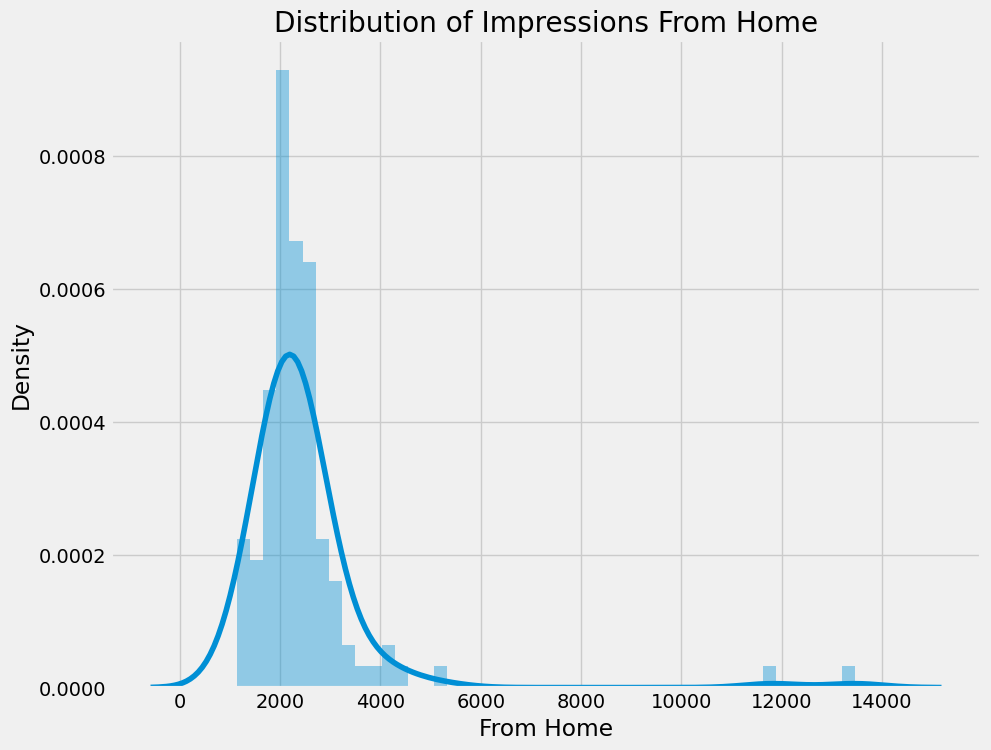

In [ ]:
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Home")
sns.distplot(data['From Home'])
plt.show()

**The impressions I get from the home section on Instagram shows how much my posts reach my followers. Looking at the impressions from home, I can say it’s hard to reach all my followers daily. Now let’s have a look at the distribution of the impressions I received from hashtags:**

<ipython-input-49-8c45b7b41edc>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




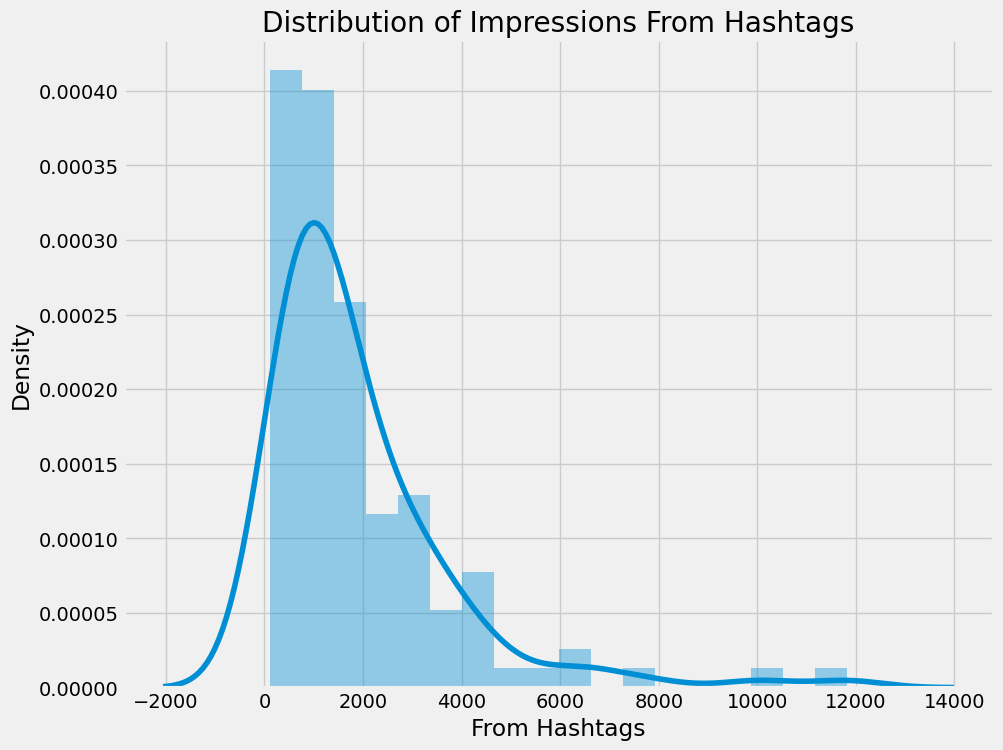

In [ ]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Hashtags")
sns.distplot(data['From Hashtags'])
plt.show()

**Now let’s have a look at the percentage of impressions I get from various sources on Instagram:**

In [ ]:
home = data["From Home"].sum()
hashtags = data["From Hashtags"].sum()
explore = data["From Explore"].sum()
other = data["From Other"].sum()

labels = ['From Home','From Hashtags','From Explore','Other']
values = [home, hashtags, explore, other]

fig = px.pie(data, values=values, names=labels,
             title='Impressions on Instagram Posts From Various Sources', hole=0.5)
fig.show()

**visualization**

In [ ]:
v=px.histogram(newdata,x='Impressions')
v.show()

In [ ]:
v=px.histogram(newdata,x='Likes')
v.show()

In [ ]:
v=px.histogram(newdata,x='Comments')
v.show()

In [ ]:
v=px.histogram(newdata,x='Follows')
v.show()

In [ ]:
v=px.histogram(newdata,x='Shares')
v.show()

In [ ]:

v=px.histogram(newdata,x='Profile Visits')
v.show()


In [ ]:
v=px.histogram(newdata,x='Saves')
v.show()

In [ ]:
v=px.histogram(newdata,x='From Explore')
v.show()

In [ ]:
v=px.histogram(newdata,x='From Hashtags')
v.show()

In [ ]:
v=px.histogram(newdata,x='From Home',title="from home")
v.show()

In [ ]:
v=px.histogram(newdata,x='From Other',title="From other")
v.show()

In [ ]:
fig = px.scatter(newdata, x="Likes", y="Shares",title="Likes vs Shares")
fig.show()

In [ ]:
fig = px.scatter(newdata, x="Impressions", y="Likes",title="Impressions vs Likes")
fig.show()

In [ ]:
fig = px.scatter(newdata, x="Impressions", y="Shares",title="Impressions vs Shares")

fig.show()

**Relationship Between Comments and Total Impressions**

In [ ]:
figure= px.scatter(data_frame = data, x="Impressions",
                    y="Comments", size="Comments", trendline="ols",
                    title = "Relationship Between Comments and Total Impressions")
figure.show()

**Hashtag**

**Now let’s create a wordcloud of the hashtags column to look at the most used hashtags in my Instagram posts:**

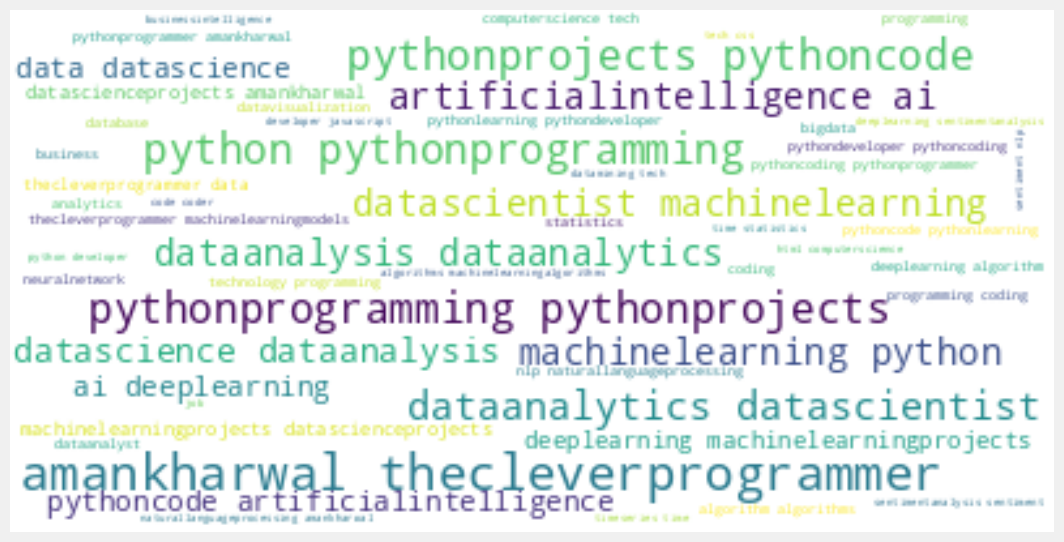

In [ ]:
text = " ".join(i for i in data.Hashtags)
stopwords = set(STOPWORDS) # here set not allowed duplicates
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##correlation

In [ ]:
correlation = newdata.corr()
print(correlation["Impressions"].sort_values(ascending=False))

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64


<ipython-input-67-3a6e8f472556>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



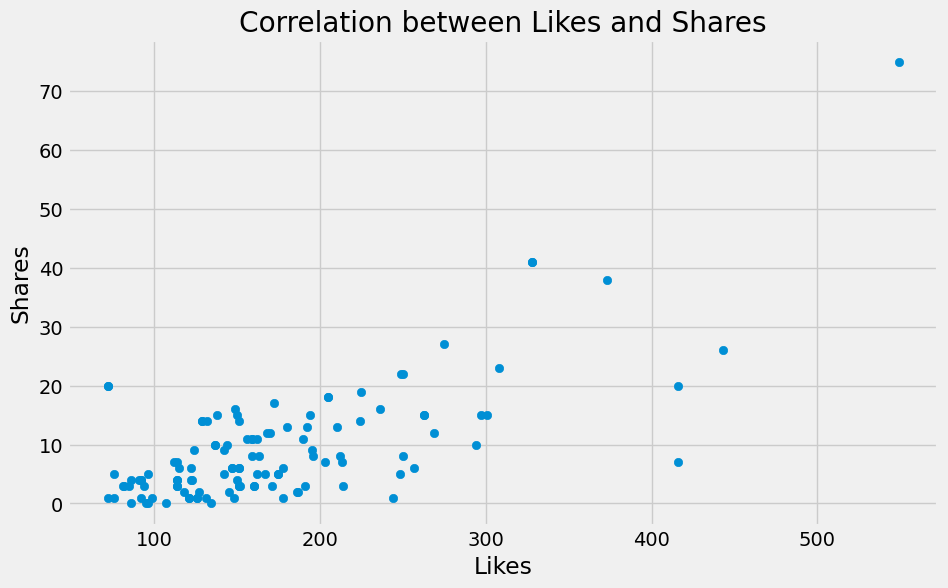

In [ ]:
# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Likes'], df['Shares'])

# Set plot title and labels
plt.title('Correlation between Likes and Shares')
plt.xlabel('Likes')
plt.ylabel('Shares')

# Show the plot
plt.show()

In [ ]:
v=px.histogram(newdata,x='Caption')
v.show()

In [ ]:
df = px.data.tips()
fig = px.scatter(newdata,x="Comments",trendline="ols")
fig.show()

In [ ]:
fig = px.scatter(newdata,x="From Explore")
fig.show()

##Visualize From Explore column as a scatter plot with size and color encoding based on Likes and Shares

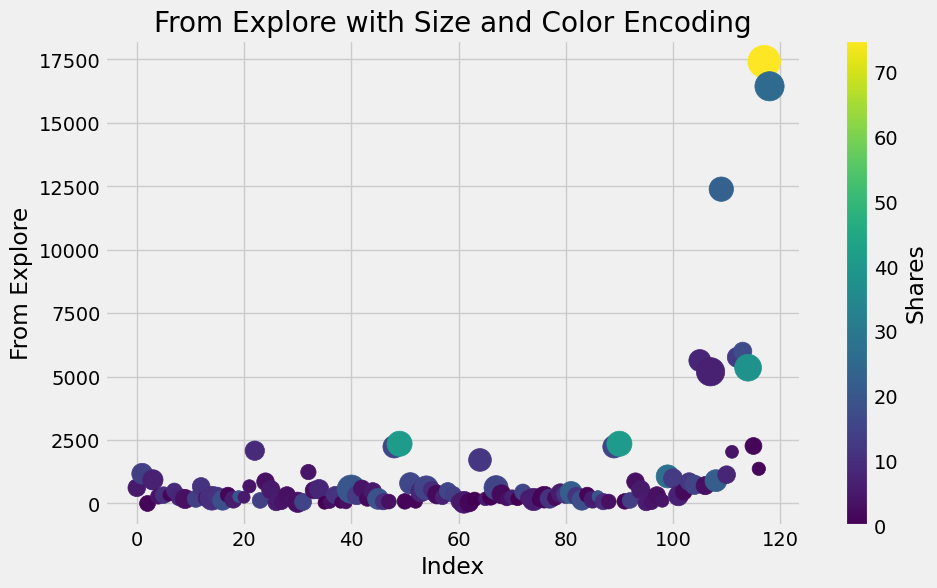

In [ ]:
# Convert the "Likes" and "Shares" columns to numeric data type
newdata['Likes'] = pd.to_numeric(newdata['Likes'], errors='coerce')
newdata['Shares'] = pd.to_numeric(newdata['Shares'], errors='coerce')
# Define size and color based on Likes and Shares
size = newdata['Likes']
color = newdata['Shares']
# Plot the scatter plot with size and color encoding
plt.figure(figsize=(10, 6))
plt.scatter(newdata.index, newdata['From Explore'], s=size, c=color, cmap='viridis')

# Set plot title and labels
plt.title('From Explore with Size and Color Encoding')
plt.xlabel('Index')
plt.ylabel('From Explore')

# Add a colorbar
plt.colorbar(label='Shares')

# Show the plot
plt.show()

##Visualizing  Hashtags column as a bar chart with the top 10 most frequent hashtags

In [ ]:
from collections import Counter

# Extract hashtags from the "Hashtags" column
hashtags = df['Hashtags'].str.lower().str.split()

# Flatten the list of hashtags
hashtags_flat = [tag for sublist in hashtags for tag in sublist]

# Count the frequency of each hashtag
hashtags_counter = Counter(hashtags_flat)

# Get the top 10 most frequent hashtags
top_10_hashtags = dict(hashtags_counter.most_common(10))

# Convert the hashtag counts into separate lists
hashtags = list(top_10_hashtags.keys())
counts = list(top_10_hashtags.values())

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(hashtags, counts)

# Set plot title and labels
plt.title('Top 10 Most Frequent Hashtags')
plt.xlabel('Hashtags')
plt.ylabel('Count')

# Rotate x-axis labels for better visibility if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()

KeyError: ignored

## correlation for likes shares

In [ ]:
# Calculate the correlation between Likes and Shares
correlation = df['Likes'].corr(df['Shares'])

# Print the correlation coefficient
print("Correlation between Likes and Shares:", correlation)

In [ ]:
# Assuming your x-axis variable is in a column named 'Likes' or 'Timestamp'
x = df['Likes']  # R
# Assuming your y-axis variable is in a column named 'Profile Visits'
y = df['Profile Visits']  # Replace 'Profile Visits' with the appropriate column name
# Assuming you want a linear trendline
coefficients = np.polyfit(range(len(y)), y, 1)
trendline = np.polyval(coefficients, range(len(y)))
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Profile Visits')
plt.plot(x, trendline, label='Trendline')
plt.xlabel('Likes')  # Replace 'Likes' with the appropriate x-axis label
plt.ylabel('Profile Visits')  # Replace 'Profile Visits' with the appropriate y-axis label
plt.title('Profile Visits over Time')  # Replace with the appropriate title
plt.legend()
plt.xticks(rotation=45)
plt.show()

